In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib import ticker
from PIL import Image
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from fractions import Fraction
font = {'family' : 'Times New Roman',
    'weight' : 'light',
    'size'   : 13,
    }
plt.rc('font',family='Times New Roman')

matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'  # 用于正常数学文本
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'  # 用于斜体数学文本

#def curve_color():
def set_axis(axes,xmaj=0.5,xmin=0.125,ymaj=0.5,ymin=0.125,aspect=None):
    if aspect:
        axes.set_aspect(aspect)
    axes.minorticks_on()
    axes.tick_params(axis="both", which="major", direction="in", width=1, length=4, labelsize=10)
    axes.tick_params(axis="both", which="minor", direction="in", width=1, length=2, labelsize=10)

    axes.xaxis.set_major_locator(MultipleLocator(xmaj))
    axes.xaxis.set_minor_locator(MultipleLocator(xmin))
    axes.yaxis.set_major_locator(MultipleLocator(ymaj))
    axes.yaxis.set_minor_locator(MultipleLocator(ymin))                    
    axes.set_xlabel(r'$x$',fontdict={'size': 12})
    axes.set_ylabel(r'$u$',fontdict={'size': 12})
    #axes.set_xticks(fontsize=10)
    #axes.set_yticks(fontsize=10)
    


In [2]:
class solver:
    def __init__(self,nx=100,CFL=0.5,a_=1,init=None,bcs=None):
        """"
        nx: the number of cells, or the total number of nodes is nx+1
        nt: the number of iterations
        CFL: stable criterion, i.e. CFL=adt/dx
        a_: phase velocity
        u_curr: u^n; u_next: u^{n+1}
        """
        self.nx=nx
        self.CFL=CFL
        self.a=a_
        if init==None:
            init=lambda x: 0 if -0.5<=x<-0.25 else (1 if -0.25<=x<=0.25 else 0)
        if bcs==None:
            bcs={'a':lambda t: 0, 'b': lambda t: 2}
        self.init=init
        self.bcs=bcs
        
        self.dx=1./nx
        self.dt=self.CFL*self.dx/self.a
        self.x_range=np.arange(-0.5,0.5,self.dx)
        self.t_range=np.arange(0,10+self.dt,self.dt)

        self.u_curr=np.zeros((nx,))
        self.u_next=np.zeros((nx,))
        for i in range(nx):
            self.u_curr[i]=self.init(i*self.dx-0.5)
        #self.u_curr[0]=self.bcs['a'](0)
        #self.u_curr[-1]=self.bcs['b'](0)
        #plt.plot(self.x_range,self.u_curr,color='b')
    
    def method(self, u_curr, u_next, tt):
        """"
        Calculate u_next with u_curr, update and return u_curr and u_next
        """
        pass
    
    def saves(self,arg,tt,data,i):
        if 'freq' in arg.keys() and tt%arg['freq']==0:
            arg['list'].append((tt,data))
        elif 'time' in arg.keys() and i<len(arg['time']) and tt*self.dt<=arg['time'][i]<(tt+1)*self.dt:
            arg['list'].append((tt,data))
            return True
    
    def solve(self, nt, arg_save=None):
        print('Solving the equation, nt: {}'.format(nt))    
        i=0
        for tt in range(nt+1):
            if arg_save and self.saves(arg_save, tt, self.u_curr.copy(),i):
                i+=1
                #arg_save['list'].append((tt,self.u_curr.copy()))
            self.u_curr, self.u_next=self.method(self.u_curr.copy(), self.u_next.copy(), tt)
 

In [3]:
class plotter:
    def __init__(self):
        self._list=[]
        self.time_list=[]
        
    def plot_result_t_all(self):
        print(len(self._list))
        plt.figure(dpi=120)
        set_axis(plt.gca(),xmaj=0.25,xmin=0.25,ymaj=1,ymin=0.25)
        for i in range(len(self._list)):
            plt.plot(self.x_range,self._list[i][1],label=r'$t=$'+'{:.4f}'.format(self._list[i][0]*self.dt)+r', $i=$'+'{:d}'.format(self._list[i][0]))
        plt.ylim(-0.3, 2.2)
        plt.legend()#loc='upper left'
        plt.show()

    def plot_result_f(self, _range):
        print(len(self._list))
        plt.figure(dpi=120)
        set_axis(plt.gca(),xmaj=0.25,xmin=0.25,ymaj=1,ymin=0.25)
        for i in _range:
            plt.plot(self.x_range,self._list[i][1],label=r'$t=$'+'{:.4f}'.format(self._list[i][0]*self.dt)+r', $i=$'+'{:d}'.format(self._list[i][0]))
        plt.ylim(-0.3, 2.2)
        plt.legend()#loc='upper left'
        plt.show()

    def plot_result_t(self):
        print(len(self._list))
        u_ana=self._list[0][1]
        f, axarr = plt.subplots(2, 2, figsize=(10, 8))
        for i in range(len(self._list)):
            print(self._list[i][0])
            set_axis(axarr[i//2][i%2],xmaj=0.25,xmin=0.25,ymaj=1,ymin=0.5)
            axarr[i//2][i%2].plot(self.x_range,np.roll(u_ana,shift=int(self.CFL*self._list[i][0])),label=r'Analytic $t=$'+'{:.1f}'.format(self._list[i][0]*self.dt)+r', $i=$'+'{:d}'.format(self._list[i][0]))
            axarr[i//2][i%2].plot(self.x_range,self._list[i][1],label=r'Numerical $t=$'+'{:.1f}'.format(self._list[i][0]*self.dt)+r', $i=$'+'{:d}'.format(self._list[i][0]))
            axarr[i//2][i%2].set_ylim(-0.3, 2.2)
            axarr[i//2][i%2].legend()#loc='upper left'
        plt.show()

In [ ]:
plot_all={'cmap':None,'norm':None}
plot_single={'color':'b'}
set_single=lambda freq, ticks=[0.5,0.125]: {'all':None,'single':plot_single, 'fig':None, 'axes':None, 'ticks':ticks, 'freq':freq}
set_all=lambda freq, ticks=[0.5,0.125]: {'all':plot_all,'single':None, 'fig':None, 'axes':None, 'ticks':ticks, 'freq':freq}
set_save_f=lambda _list, freq=1: {'list': _list, 'freq':freq}
set_save_t=lambda _list, time=1: {'list': _list, 'time':time}

In [ ]:
class LaxWendroff(solver,plotter):
    def __init__(self, nx=100, CFL=0.5, a_=1, init=None, bcs=None):
        super().__init__(nx, CFL, a_, init, bcs)
        self._list=[]
        self.time_list=[0,0.1, 1.0, 10.0]
        print('Method: LaxWendroff, nx: {}, dx: {}, CFL: {}, dt: {}'.format(self.nx, self.dx, self.CFL, self.dt))
    
    def method(self, u_curr, u_next, tt):
        return u_curr - self.CFL/2*(np.roll(u_curr, shift=-1)-np.roll(u_curr, shift=1))+self.CFL**2/2*(np.roll(u_curr,shift=1)-2*u_curr+np.roll(u_curr,shift=-1)), u_next
    
    def solve(self, nt):
        #return solver.solve(self,nt,arg_plot=None,arg_save=set_save_f(self._list))
        return solver.solve(self,nt,arg_save=set_save_t(self._list,self.time_list))

Method: LaxWendroff, nx: 100, dx: 0.01, CFL: 0.5, dt: 0.005
Solving the equation, nt: 2000
4
0
20
200
2000


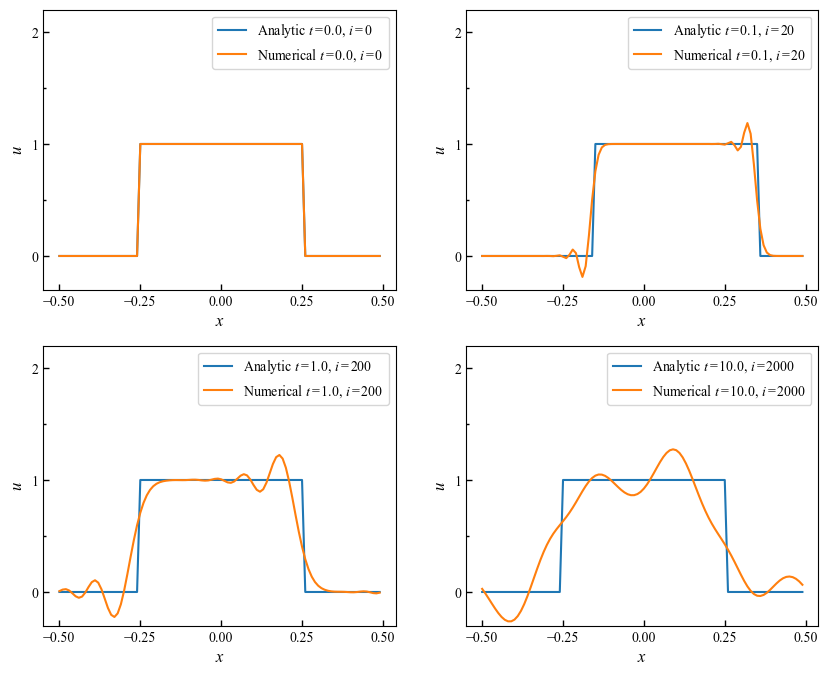

In [6]:
test_LaxWendroff=LaxWendroff(nx=100)
test_LaxWendroff.solve(int(10/test_LaxWendroff.dt))
test_LaxWendroff.plot_result_t()

In [7]:
class WarmingBeam(solver,plotter):
    def __init__(self, nx=100, CFL=0.5, a_=1, init=None, bcs=None):
        super().__init__(nx, CFL, a_, init, bcs)
        
        self._list=[]
        self.time_list=[0,0.1, 1.0, 10.0]
        print('Method: WarmingBeam, nx: {}, dx: {}, CFL: {}, dt: {}'.format(self.nx, self.dx, self.CFL, self.dt))
    
    def method(self, u_curr, u_next, tt):
        return u_curr - self.CFL/2*(3*u_curr-4*np.roll(u_curr, shift=1)+np.roll(u_curr, shift=2))+self.CFL**2/2*(np.roll(u_curr,shift=2)-2*np.roll(u_curr,shift=1)+u_curr), u_next
    
    def solve(self, nt):
        #return solver.solve(self,nt,arg_plot=None,arg_save=set_save_f(self._list))
        return solver.solve(self,nt,arg_save=set_save_t(self._list,self.time_list))
    

Method: WarmingBeam, nx: 100, dx: 0.01, CFL: 0.5, dt: 0.005
Solving the equation, nt: 2000
4
0
20
200
2000


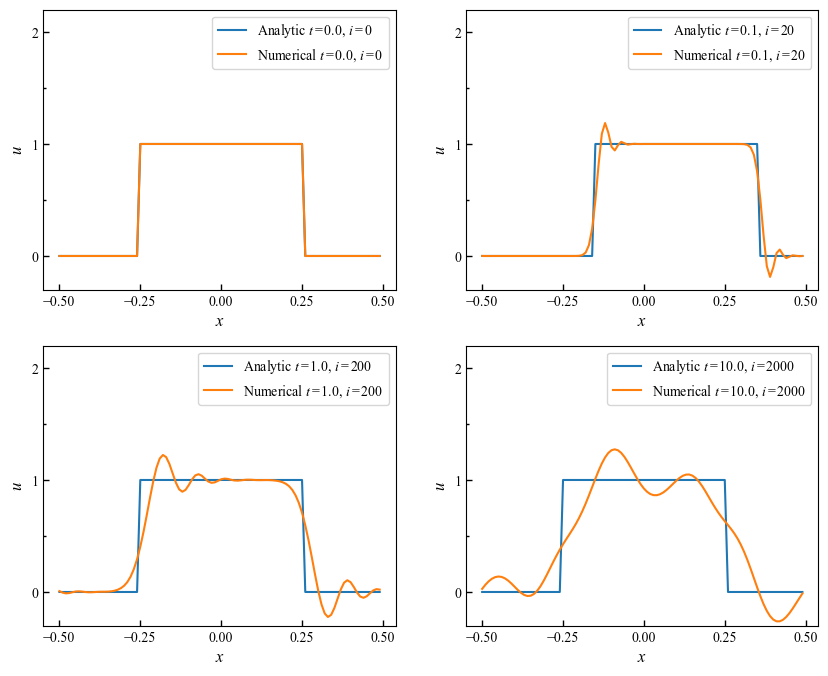

In [8]:
test_WarmingBeam=WarmingBeam(nx=100)
test_WarmingBeam.solve(int(10/test_WarmingBeam.dt))
test_WarmingBeam.plot_result_t()

In [ ]:
class NewScheme(solver,plotter):
    def __init__(self, nx=100, CFL=0.5, a_=1, init=None, bcs=None):
        super().__init__(nx, CFL, a_, init, bcs)
        self._list=[]
        self.time_list=[0,0.1, 1.0, 10.0]
        print('Method: NewScheme, nx: {}, dx: {}, CFL: {}, dt: {}'.format(self.nx, self.dx, self.CFL, self.dt))
    
    def method(self, u_curr, u_next, tt):
        return 1/3*(1+self.CFL)*(u_curr - self.CFL/2*(np.roll(u_curr, shift=-1)-np.roll(u_curr, shift=1))+self.CFL**2/2*(np.roll(u_curr,shift=1)-2*u_curr+np.roll(u_curr,shift=-1)))\
            +1/3*(2-self.CFL)*(u_curr - self.CFL/2*(3*u_curr-4*np.roll(u_curr, shift=1)+np.roll(u_curr, shift=2))+self.CFL**2/2*(np.roll(u_curr,shift=2)-2*np.roll(u_curr,shift=1)+u_curr)), u_next
    
    def solve(self, nt):
        #return solver.solve(self,nt,arg_plot=None,arg_save=set_save_f(self._list))
        return solver.solve(self,nt,arg_save=set_save_t(self._list,self.time_list))
    

Method: NewScheme, nx: 100, dx: 0.01, CFL: 0.5, dt: 0.005
Solving the equation, nt: 2000
4
0
20
200
2000


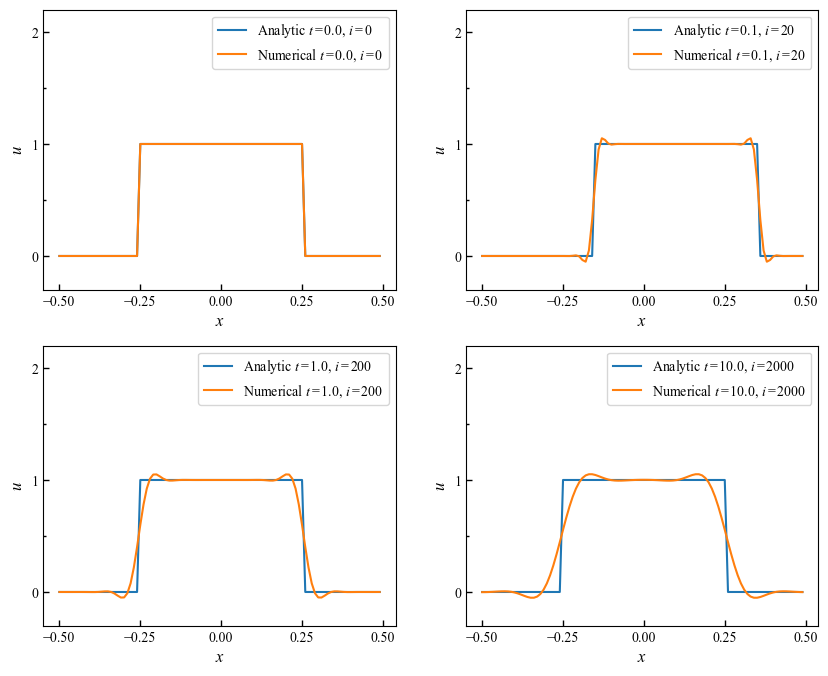

In [10]:
test_NewScheme=NewScheme(nx=100)
test_NewScheme.solve(int(10/test_NewScheme.dt))
test_NewScheme.plot_result_t()